# Perusahaan <i>ride-sharing</i> Zuber Chicago

# Daftar Isi <a id='back'></a>

* [Pendahuluan](#intro)

* [Tahap 1. Ikhtisar Data](#data_review)
    * [Kesimpulan](#data_review_conclusions)
    
* [Tahap 2. Pra-pemrosesan data](#data_preprocessing)
    * [Kesimpulan](#data_preprocessing_conclusions)
    
* [Tahap 3. Analisis](#analysis)
    * [3.1 Top 10 lokasi dropoff](#als_top10_lokasi_dropoff)
    * [3.2 Ranking perusahaan taxi berdasarkan jumlah trip](#als_ranking_taxi_trip)
    * [3.3 Kesimpulan](#analysis_conclusions)

* [Tahap 4. Pengujian Hipotesis](#hypothesis_test)
    * [4.1 Uji Hipotesis: 'Durasi rata-rata perjalanan dari Loop ke O'Hare International Airport berubah pada hari Sabtu waktu hujan"](#test_1)

* [Temuan](#end)

## Pendahuluan <a id='intro'></a>

Peneliti akan melakukan analisis data pada perusahaan Taxi di Chicago. Untuk hal tersebut peneliti memiliki 3 kumpulan data untuk dikerjakan. Yang pertama berisi nama perusahaan dan jumlah perjalanan yang dilakukan oleh taksi milik perusahaan tersebut. Yang kedua berisi nama lokasi dropoff (lingkungan) dan rata-rata jumlah perjalanan ke lingkungan tersebut. Yang pertama dan kedua akan digunakan untuk analisis utama. Kumpulan data ketiga berisi tanggal dan waktu, kondisi cuaca, dan durasi perjalanan dari lingkungan Loop ke Bandara Internasional O'Hare pada hari Sabtu. Dataset ini akan digunakan untuk pengujian hipotesis

### Tujuan: 
Menyiapkan laporan untuk Zuber, perusahaan ride-sharing baru yang diluncurkan di Chicago, untuk mengidentifikasi pola yang menentukan preferensi penumpang dan dampak faktor eksternal terhadap perjalanan.

Menguji hipotesis berikut:
* Durasi rata-rata perjalanan dari lingkungan Loop ke O'Hare International Airport berubah pada hari Sabtu waktu hujan.


### Tahapan

Data tentang perusahaan taxi, rata-rata perjalanan, dan kondisi cuaca terdapat dalam *file*:

**project_sql_result_01.csv** 
File tersebut berisi data sebagai berikut:
- *company_name*: nama perusahaan taxi
- *trips_amount*: jumlah perjalanan setiap perusahaan taxi Novemberpada 15-16 November 2017.

**project_sql_result_04.csv**
File tersebut berisi data sebagai berikut:
- *dropoff_location_name*: Lingkungan Chicago di mana perjalanan berakhir
- *average_trips*: rata-rata jumlah perjalanan yang berakhir di setiap lingkungan pada bulan November 2017.

**project_sql_result_07.csv**
File tersebut berisi data sebagai berikut:
- *start_ts*: waktu dan tanggal berangkat
- *weather_conditions* : kondisi cuaca pada saat perjalanan dimulai
- *duration_seconds*: durasi perjalanan dalam detik

Tidak ada informasi terkait kualitas data tersebut, jadi perlu diperiksa terlebih dahulu sebelum melakukan analisis lebih lanjut.

Pertama akan dilakukan evaluasi kualitas data dan melihat apakah terdapat hal yang signifikan yang perlu dilakukan tindak lanjut sebelum dilakukan proses analisis, di antaranya:
* Mengkonversi data menjadi tipe data yang dibutuhkan
* Menemukan dan mengeliminasi kesalahan pada data

Proyek ini akan terdiri dari empat tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data
 3. Proses Analisis
 4. Uji Hipotesis

 
[Kembali ke Daftar Isi](#back)

## Tahap 1. Ikhtisar Data <a name="data_review"></a>

**Step 1.1**
Melakukan import libraries yang diperlukan

In [1]:
from scipy import stats as st #untuk perhitungan statistik dan probabilitas
import pandas as pd #untuk manipulasi dataframe
import matplotlib.pyplot as plt #untuk plot dan display grafik
import numpy as np #untuk operasi matematika tingkat lanjut

**Step 1.2**
Melakukan load data yang diperlukan dari dataset yang pertama yaitu file *project_sql_result_01.csv*

In [2]:
try:
    company_data = pd.read_csv('project_sql_result_01.csv')
except:
    company_data = pd.read_csv('/datasets/project_sql_result_01.csv')
#membaca file csv dan konversi ke dataframe company_data

company_data.head() #melihat 5 baris awal dari dataframe company_data

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
company_data.info() #informasi umum terkait dataframe company_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Tidak terdapat nilai yang hilang dan tipe data sudah sesuai.

**Step 1.3**
Melakukan load data yang diperlukan dari dataset yang kedua yaitu file *project_sql_result_02.csv*

In [4]:
try:
    dropoff_data = pd.read_csv('project_sql_result_04.csv')
except:
    dropoff_data = pd.read_csv('/datasets/project_sql_result_04.csv')
#membaca file csv dan konversi ke dataframe dropoff_data

dropoff_data.head() #melihat 5 baris awal dari dataframe dropoff_data

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
dropoff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Tidak terdapat nilai yang hilang, tipe data float perlu diubah ke integer.

### Kesimpulan <a id='data_review_conclusions'></a> 

Tidak terdapat nilai yang hilang, namun diperlukan perubahan tipe data dan pemeriksaan duplikat.

[Kembali ke Daftar Isi](#back)

## Tahap 2. Pra-pemrosesan Data <a id='data_preprocessing'></a>

**Step 2.1**
Memeriksa company_data

In [6]:
company_data.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Catatan:
- `trips_amount` berkisar antara 2 hingga hampir 20.000, terdapat perbedaan yang signifikan antara nilai mean dan median, standar deviasi cukup tinggi, sehingga kita dapat berasumsi bahwa distribusinya tidak normal, cenderung memiliki skew positif.

**Step 2.2**
Memeriksa dropoff_data

In [7]:
dropoff_data.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Catatan:
- `average_trips` berkisar antara 2 hingga lebih dari 10.000, terdapat perbedaan yang signifikan antara nilai mean dan median, standar deviasi cukup tinggi, sehingga kita dapat berasumsi bahwa distribusinya tidak normal, cenderung memiliki skew positif.

**Step 2.3**
Memeriksa duplikat

In [8]:
company_data.duplicated().sum()

0

In [9]:
dropoff_data.duplicated().sum()

0

Tidak terdapat duplikat yang ditemukan.

**Step 2.4**
Melakukan konversi tipe data average_trip menjadi integer

Kolom average_trips memiliki tipe float. Kita perlu membulatkan nilainya dan mengubah tipenya menjadi bilangan bulat.

In [10]:
dropoff_data['average_trips'] = dropoff_data['average_trips'].round()
#membulatkan nilai kolom average_trips

dropoff_data['average_trips'] = dropoff_data['average_trips'].astype('int')
#mengubah tipe data kolom average_trips ke integer

dropoff_data.head()#melihat 5 baris awal dropoff_data

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


[Kembali ke Daftar Isi](#back)

### Kesimpulan <a id='data_preprocessing_conclusions'></a> 

Kita memeriksa company_data dan dropoff_data, juga memeriksa duplikat, dan telah melakukan konversi tipe data average_trip menjadi integer pada dropoff_data untuk analisis lebih lanjut.

## Tahap 3. Analisis <a name='analysis'></a>

### Top 10 lokasi dropoff <a name="als_top10_lokasi_dropoff"></a>

**Step 3.1**
Mengurutkan tabel dropoff_data berdasarkan urutan kolom average_trips dalam urutan descending

In [11]:
top10 = dropoff_data.sort_values(by='average_trips', ascending=False).head(10)
#mengurutkan dropoff_data secara descending berdasarkan value average_trips dan melihat 10 bari awal
top10

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


**Step 3.2**
Membuat bar chart dan pie chart dari top10 data sebelumnya

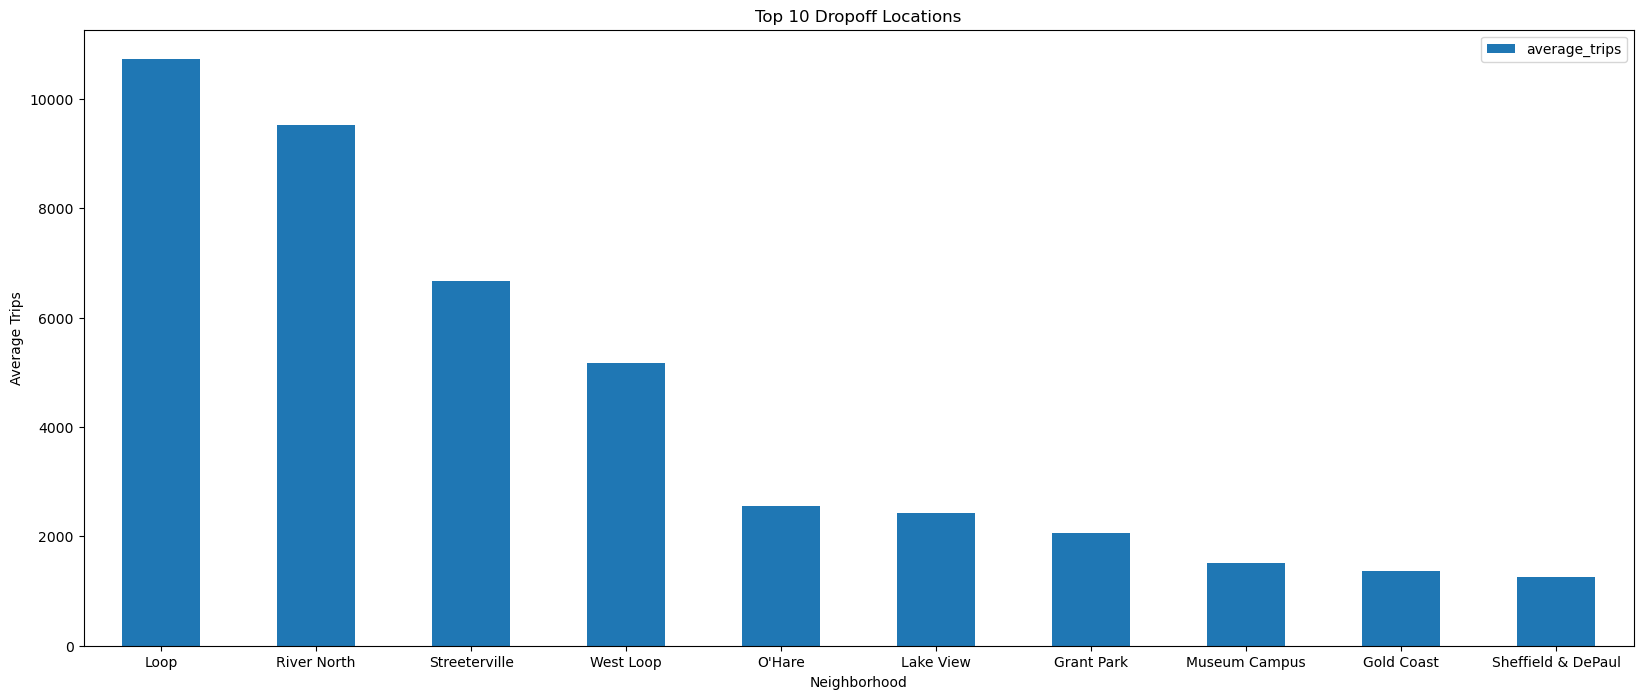

In [12]:
top10.plot.bar(x='dropoff_location_name', y='average_trips', rot=0, figsize=(20, 8))
#menampilkan bar chart dengan sumbu-x neighborhoods dan sumbu-y average_trips dengan ukuran 20 x 8 inci
plt.title('Top 10 Dropoff Locations')#memberikan judul grafik dengan Top 10 Lokasi Dropoff
plt.xlabel('Neighborhood')#melabeli sumbu-x dengan Neighborhood
plt.ylabel('Average Trips')#melabeli sumbu-y dengan Average Trips
plt.show()#menampilkan grafik

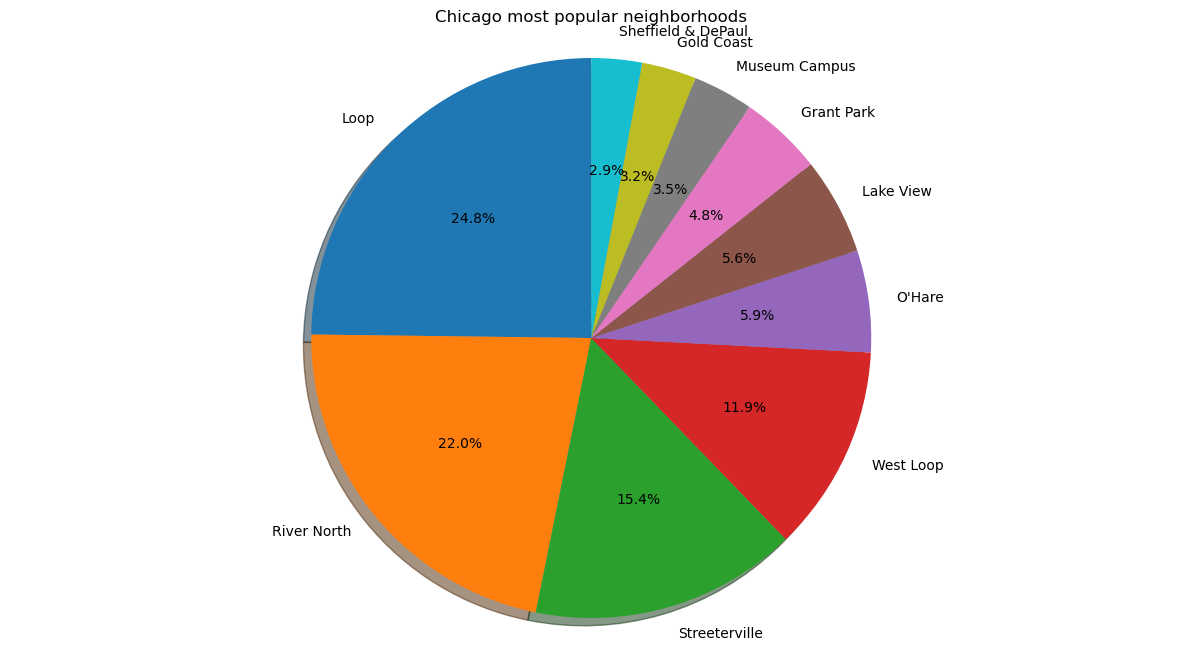

In [13]:
top10['%'] = top10['average_trips']/(top10['average_trips']).sum()

fig, ax = plt.subplots(1,figsize=(15,8))

labels = top10['dropoff_location_name']
sizes = top10['%']

ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  #untuk memastikan bentuk pie bundar
ax.set_title("Chicago most popular neighborhoods");

Tujuan yang paling populer adalah lingkungan Looop, River North, Streeterville, dan West Loop. Yang paling tidak populer adalah Sheffield & DePaul. Ada perbedaan signifikan antara empat besar dan lainnya di mana terpopuler keempat (West Loop) memiliki jumlah kunjungan sekitar dua kali lipat dibandingkan O'Hare (terpopuler ke-5)

### Ranking perusahaan taxi berdasarkan jumlah trip <a name="als_ranking_taxi_trip"></a>

Kita dapat memplot diagram batang yang memperlihatkan data ini dari tabel data_perusahaan. Mengingat jumlahnya 64, kita dapat membuat diagram batang menjadi horizontal dengan menggunakan 'plot.barh', bukan 'plot.bar'. Kita juga dapat melakukan verifikasi rentang nilai di kolom trips_amount dengan melihat deskripsi numerik dari kolom tersebut.

In [14]:
company_data['trips_amount'].describe()#deskripsi numerik dari kolom average_trips

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

Nilai minimum dalam trips_amount hanya 2 perjalanan. Kita perlu menyaring perusahaan-perusahaan yang jumlahnya tidak terlalu signifikan. Kita dapat menetapkan ambang batas sebesar 500. Jadi kita dapat membuat potongan dari tabel company_data untuk baris-baris dengan nilai di kolom trips_amount lebih besar atau sama dengan 500 (company_data.query('trips_amount >= 500')) dan memplot horizontal bar chart untuk nilai-nilai tersebut

**Step 3.3**
Membuat horizontal bar chart dari top10 data sebelumnya

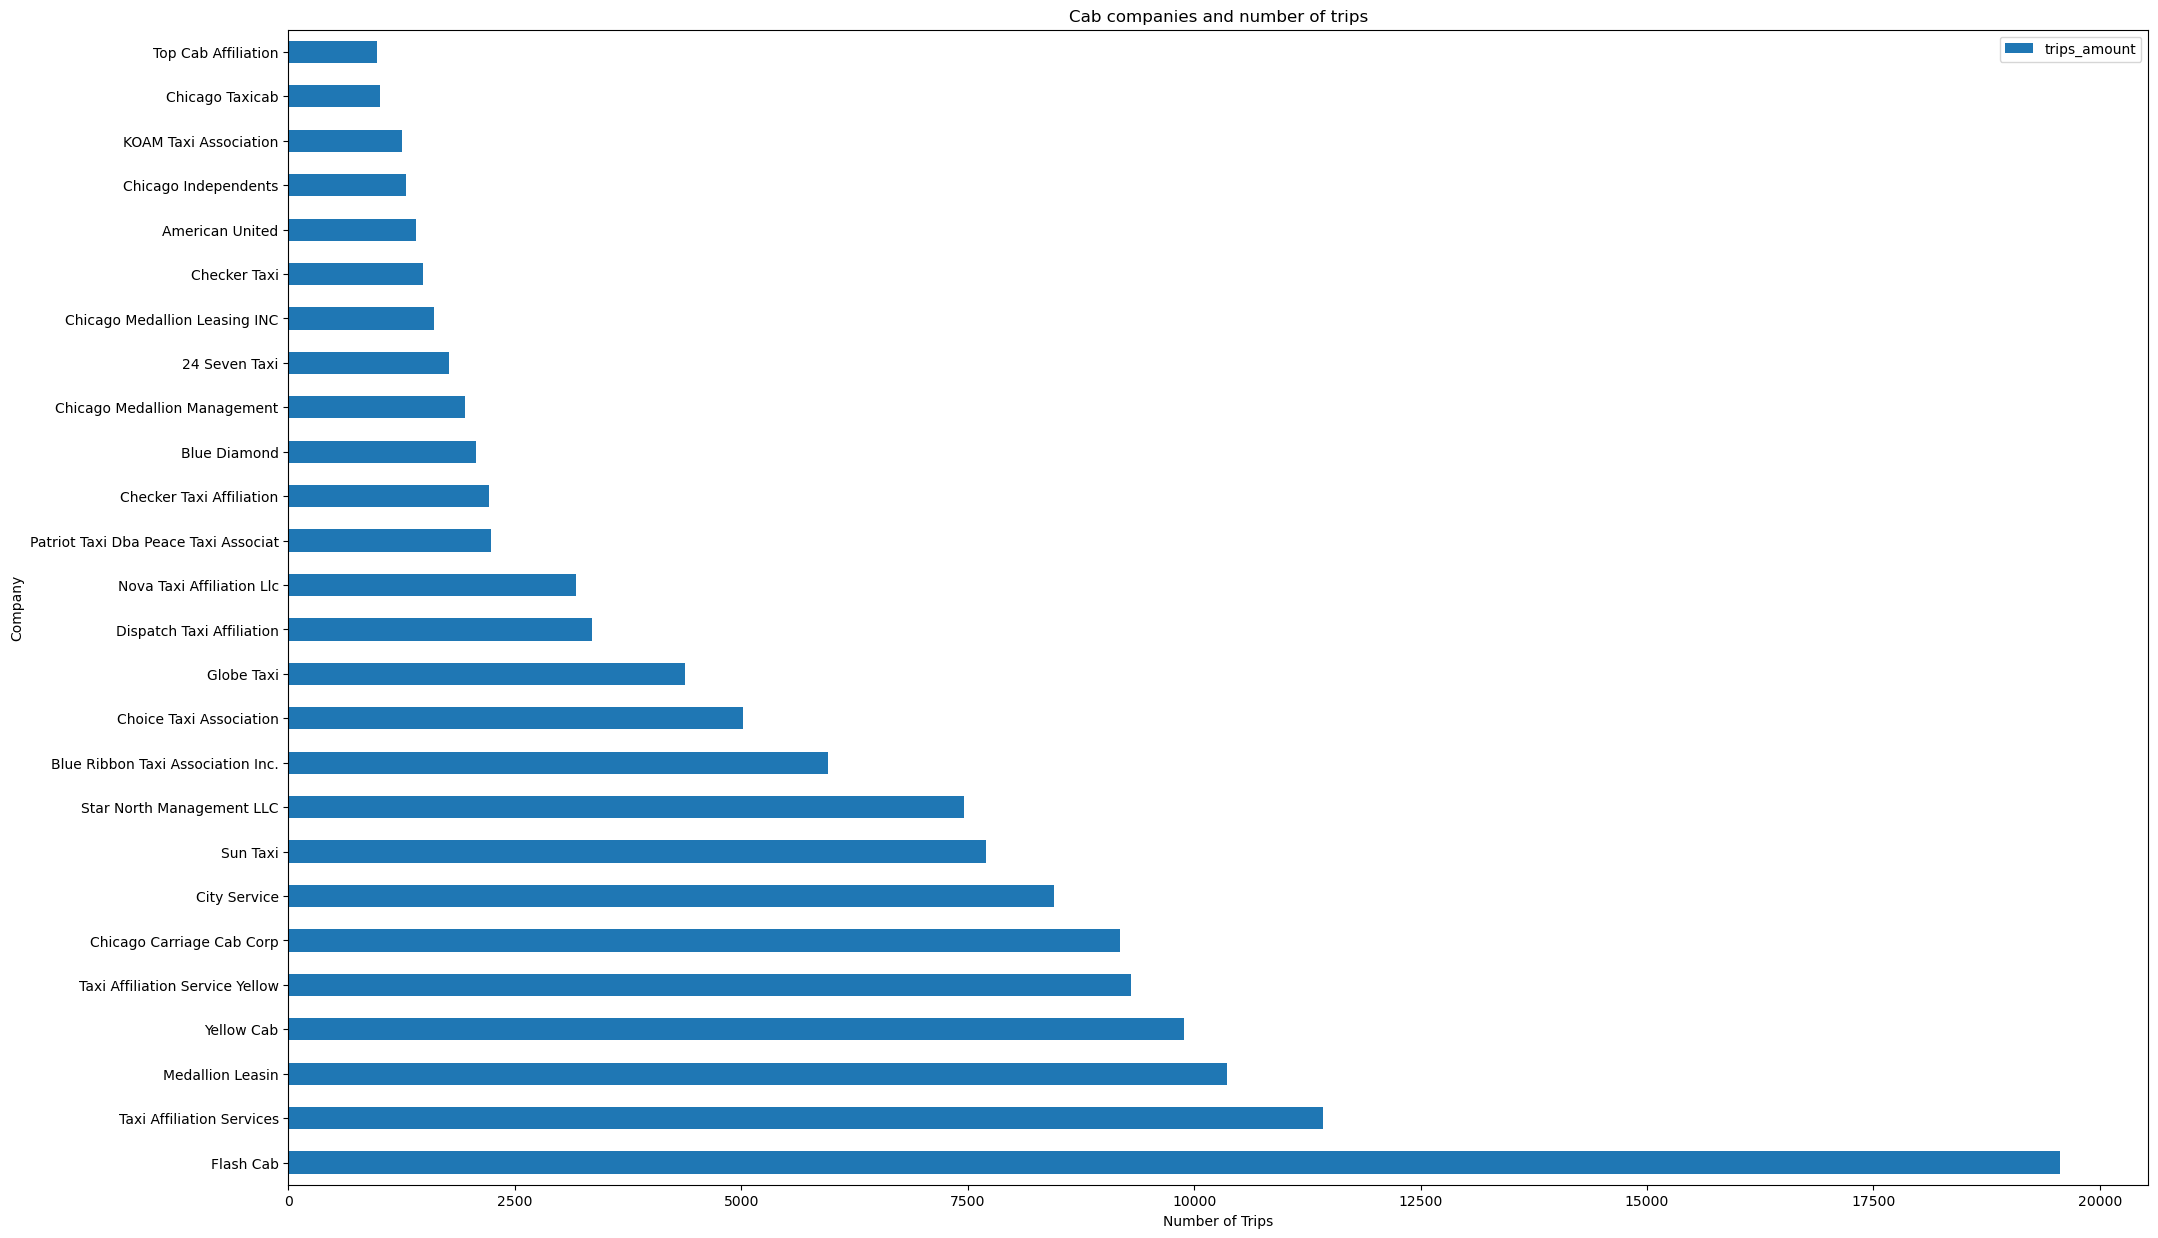

In [15]:
company_data.query('trips_amount >= 500').plot.barh(x='company_name', y='trips_amount', rot=0, figsize=(24, 15))
plt.title('Cab companies and number of trips')
plt.xlabel('Number of Trips')
plt.ylabel('Company')
plt.show()

### Kesimpulan <a id='analysis_conclusions'></a> 

Flash Cab berada di posisi teratas, yang kemungkinannya memiliki lebih banyak taksi di jalan. Kedua adalah Taxi Affiliation Services. Setelah difilter dengan ambang batas 500, hanya ada 26 perusahaan di grafik kami. Artinya, 38 perusahaan memiliki kurang dari 500 perjalanan, sehingga dapat disimpulkan bahwa sebagian besar pangsa pasar dikuasai oleh sejumlah kecil perusahaan.

[Kembali ke Daftar Isi](#back)

## Tahap 4. Pengujian Hipotesis <a name="hypothesis_test"></a>

### Uji Hipotesis: 'Durasi rata-rata perjalanan dari Loop ke O'Hare International Airport berubah pada hari Sabtu waktu hujan' <a id='test_1'></a>

**Step 4.1**
Melakukan load data yang diperlukan dari dataset yang ketiga yaitu file *project_sql_result_07.csv*

In [16]:
try:
    loop_ohare = pd.read_csv('project_sql_result_07.csv')
except:
    loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')
#membaca file csv dan konversi ke dataframe loop_ohare
loop_ohare.head() #melihat 5 baris awal dari dataframe loop_ohare

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [17]:
loop_ohare.info()#informasi umum terkait loop_ohare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Yang perlu dilakukan adalah mengubah tipe data kolom start_ts menjadi tanggal-waktu. Dengan menggunakan metode 'pd.to_datetime', argumen formatnya adalah '%Y%m%d %H%M%S' sehingga mencerminkan format yang ada di kolom.

**Step 4.2**
Mengubah tipe data kolom start_ts menjadi date-time

In [18]:
loop_ohare['start_ts']=pd.to_datetime(loop_ohare['start_ts'], format='%Y-%m-%d %H:%M:%S')
#mengubah format kolom start_ts menjadi date-time
loop_ohare.info()#informasi umum terkait loop_ohare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


**Step 4.3**
Membuat dua bagian data, satu dengan value kolom kondisi_cuaca "Good", dan satu lagi dengan value kolom kondisi_cuaca "Bad"

In [19]:
good_weather = loop_ohare.query('weather_conditions == "Good"')
#membuat irisan dari loop_ohare dengan kondisi cuaca "Good" 
good_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 1066
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            888 non-null    datetime64[ns]
 1   weather_conditions  888 non-null    object        
 2   duration_seconds    888 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.8+ KB


In [20]:
bad_weather = loop_ohare.query('weather_conditions == "Bad"')
#membuat irisan dari loop_ohare dengan kondisi cuaca "Bad" 
bad_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 6 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            180 non-null    datetime64[ns]
 1   weather_conditions  180 non-null    object        
 2   duration_seconds    180 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.6+ KB


Hipotesis Nol berbunyi: 'Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare adalah sama pada hari Sabtu hujan'.
Sedangkan Hipotesis Alternatif berbunyi: 'Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari Sabtu hujan'.
Sebelum menguji hipotesis, kita perlu menguji apakah variansnya dapat dianggap homogen. Untuk melakukannya, kita akan mengimplementasikan pengujian Levene menggunakan metode st.levene() yang akan mengambil kolom user_score dari kedua irisan sebagai argument, dan juga melakukan setting parameter "center='mean'". Metode ini mengembalikan nilai p yang akan kita bandingkan dengan ambang batas yang disebut statistical significance (umum disebut alpha). Kita akan menetapkan alpha sebesar 5%. Jika nilai p yang dikembalikan lebih besar dari alpha, maka variansnya dapat dianggap homogen. Jika lebih rendah dari alpha, maka variansnya tidak bisa dianggap homogen.

**Step 4.4**
Menguji apakah variansnya dapat dianggap homogen

In [21]:
alpha = 0.05 #setting alpha menjadi 5%
result = st.levene(good_weather['duration_seconds'], bad_weather['duration_seconds'], center='mean')
#mengimplementasikan Levene's test terhadap irisan yang menspesifikasikan varians dihitung dengan mean
print('p-value:', result.pvalue)#mencetak nilai p
if result.pvalue > alpha:#kondisi bila nilai p lebih besar dari alpha
    print('The variances are approximately the same')#Varians secara umum sama, bisa disebut homogen
else:#kondisi bila nilai p lebih kecil dari alpha
    print('The variances are too far apart to be considered homogeneous')
    #Varians tidak bisa diebut homogen

p-value: 0.3968505113995001
The variances are approximately the same


Nilai p lebih besar dari alpha sehingga kita dapat menganggap variansnya sama atau homogen untuk uji hipotesis. Untuk menguji hipotesis, kita akan menggunakan metode st.ttest_ind() yang menguji kemungkinan rata-rata (rata-rata) dari 2 populasi statistik (dalam hal ini kedua kolom irisan kita) adalah sama. 
Dibutuhkan kedua kolom irisan sebagai argument, dan kita akan menetapkan parameter 'equal_var=True' karena kita menyimpulkan dari uji Levene bahwa varians dapat dianggap homogen. Ini juga mengembalikan nilai p yang akan kita bandingkan dengan alpha. Jika nilai p lebih besar dari alpha, berarti rata-ratanya kemungkinan besar sama, sehingga kita tidak dapat menolak hipotesis nol. Jika tidak, kita dapat menolak hipotesis nol atau menerima hipotesis alternatif.

**Step 4.5**
Menguji hipotesis nol dan alternatif.

In [22]:
alpha = 0.05 #setting alpha menjadi 5%
result = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'], equal_var=True)
#mengimplementasikan t-test terhadap irisan yang menspesifikasikan varians homogen
print('p-value:', result.pvalue)#mencetak nilai p
if result.pvalue > alpha:#kondisi bila nilai p lebih besar dari alpha
    print('We cannot reject the null hypothesis')
    #Nilainya sama. Kita tidak dapat menolak hipotesis nol
else:#kondisi bila nilai p lebih besar dari alpha
    print('We reject the null hypothesis')
    #Nilainya tidak sama. Kita dapat menolak hipotesis nol

p-value: 6.517970327099473e-12
We reject the null hypothesis


Nilai p lebih kecil dari alpha, oleh karena itu hipotesis nol ditolak yang berarti hipotesis alternatif diterima yakni bahwa: "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari Sabtu waktu hujan."

## Temuan <a name="end"></a>

Kita membuat peringkat 10 lingkungan teratas, dengan lingkungan Loop berada di posisi teratas. Kita juga membuat peringkat pada perusahaan taksi dan menemukan bahwa Flash Cab mendominasi. Kita juga telah menguji hipotesis yang menghasilkan kesimpulan bahwa durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari Sabtu waktu hujan.

[Kembali ke Daftar Isi](#back)